### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Load Data

In [2]:
dataframe = pd.read_csv("abalone.csv")
dataframe.dropna() #Removes Missing Values
dataframe = pd.get_dummies(dataframe, columns=["sex"]) #One hot encode "sex" label
dataframe

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [3]:
#Convert Dataframe to Dataset
def df_to_ds(dataframe, selected_features, selected_targets, batch_size=32):
    features = dataframe[selected_features]
    targets = dataframe[selected_targets]
    ds = tf.data.Dataset.from_tensor_slices((dict(features), np.array(targets)))
    ds = ds.batch(batch_size)
    return ds

In [4]:
#Selected Features and Target
selected_features = [
    "length",
    "diameter",
    "height",
    "whole-weight",
    "rings"]

selected_targets = ["sex_M", "sex_F", "sex_I"]

#Feature Columns
feature_columns = []    
for f in selected_features:
    feature_columns.append(tf.feature_column.numeric_column(f))

#Create Tensorflow Datasets
train_per = 0.6
validation_per = 0.3
test_per = 0.1
batch_size = 32

train_dataframe, test_dataframe = train_test_split(dataframe, test_size=test_per)
train_dataframe, validation_dataframe = train_test_split(train_dataframe, test_size=validation_per / (1 - test_per))

train_dataset = df_to_ds(
    train_dataframe,
    selected_features,
    selected_targets,
    batch_size=batch_size)
validation_dataset = df_to_ds(
    validation_dataframe,
    selected_features,
    selected_targets,
    batch_size=batch_size)
test_dataset = df_to_ds(
    test_dataframe,
    selected_features,
    selected_targets,
    batch_size=batch_size)

### Create Models

In [5]:
linear_model = tf.keras.models.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns),
    tf.keras.layers.Dense(3, kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)),
])

linear_model.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])

In [6]:
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns),
    tf.keras.layers.Dense(10, activation=tf.nn.leaky_relu, kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation=tf.nn.leaky_relu, kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(3),
])

nn_model.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])

### Train Models

In [7]:
def plot_loss(model):
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.tight_layout()
    plt.plot(model.history.history["loss"], label="loss")
    if("val_loss" in model.history.history.keys()):
        plt.plot(model.history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()

In [8]:
def plot_accuracy(model):
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.tight_layout()
    plt.plot(model.history.history["accuracy"], label="accuracy")
    if("val_accuracy" in model.history.history.keys()):
        plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



79/79 - 1s - loss: 5.7516 - accuracy: 0.3252 - val_loss: 5.7551 - val_accuracy: 0.3025
Epoch 2/30
79/79 - 0s - loss: 4.8463 - accuracy: 0.3456 - val_loss: 4.9675 - val_accuracy: 0.3711
Epoch 3/30
79/79 - 1s - loss: 4.1983 - accuracy: 0.4230 - val_loss: 4.2770 - val_accuracy: 0.4206
Epoch 4/30
79/79 - 0s - loss: 3.5695 - accuracy: 0.4413 - val_loss: 3.5706 - val_accuracy: 0.4326
Epoch 5/30
79/79 - 1s - loss: 2.9302 - accuracy: 0.4489 - val_loss: 2.8579 - val_accuracy: 0.4381
Epoch 6/30
79/79 - 1s - loss: 2.2953 - accuracy: 0.4589 - val_loss: 2.1634 - val_accuracy: 0.4405
Epoch 7/30
79/79 - 1s - loss: 1.7102 - accuracy: 0.4685 - val_loss: 1.5681 - val_accuracy: 0.4437
Epoch 8/30
79/79 - 0s - loss: 1.2928 - accuracy: 0.4785 - val_loss: 1.2272 - val_accuracy: 0.4573
Epoch 9/30
79/79 - 0s - loss: 1.1255 - accuracy: 0.4892 - val_loss: 1.1262 - val_accuracy: 0.4597
Epoch 10/30
79/79 - 0s - loss: 1.0912 - accuracy: 0.4824 - val_loss: 1.1030 - val_accuracy: 0.4629
Epoch 11/30
79/79 - 0s - loss:

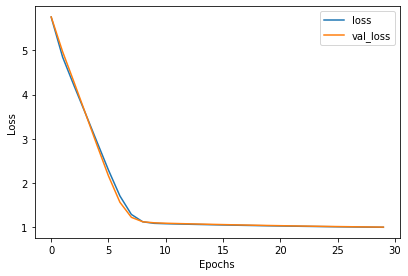

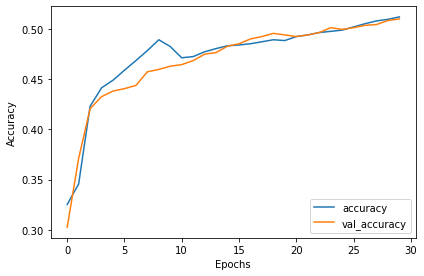

In [9]:
linear_model.fit(train_dataset, validation_data=validation_dataset, epochs=30, verbose=2)

plot_loss(linear_model)
plot_accuracy(linear_model)

In [ ]:
nn_model.fit(train_dataset, validation_data=validation_dataset, epochs=30, verbose=2)

plot_loss(nn_model)
plot_accuracy(nn_model)

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



79/79 - 1s - loss: 1.3376 - accuracy: 0.3444 - val_loss: 1.1956 - val_accuracy: 0.3863
Epoch 2/30
79/79 - 1s - loss: 1.1867 - accuracy: 0.3520 - val_loss: 1.1628 - val_accuracy: 0.4126
Epoch 3/30
79/79 - 1s - loss: 1.1560 - accuracy: 0.4298 - val_loss: 1.1350 - val_accuracy: 0.5196
Epoch 4/30
79/79 - 1s - loss: 1.1283 - accuracy: 0.4844 - val_loss: 1.1109 - val_accuracy: 0.5427
Epoch 5/30
79/79 - 1s - loss: 1.1039 - accuracy: 0.5068 - val_loss: 1.0897 - val_accuracy: 0.5387
Epoch 6/30
79/79 - 1s - loss: 1.0823 - accuracy: 0.5180 - val_loss: 1.0713 - val_accuracy: 0.5331
Epoch 7/30
79/79 - 1s - loss: 1.0633 - accuracy: 0.5235 - val_loss: 1.0555 - val_accuracy: 0.5299
Epoch 8/30
79/79 - 2s - loss: 1.0466 - accuracy: 0.5219 - val_loss: 1.0417 - val_accuracy: 0.5339
Epoch 9/30
79/79 - 1s - loss: 1.0321 - accuracy: 0.5200 - val_loss: 1.0295 - val_accuracy: 0.5395
Epoch 10/30


### Evaluation

In [ ]:
linear_model.evaluate(test_dataset)

In [ ]:
nn_model.evaluate(test_dataset)

### Predictions

In [ ]:
labels = test_dataframe[selected_targets].reset_index(drop=True)

In [ ]:
linear_predictions = pd.DataFrame(tf.nn.softmax(linear_model.predict(test_dataset)).numpy()).join(labels)
linear_predictions.columns = ["probability_M", "probability_F", "probability_I", "label_M", "label_F", "label_I"]

linear_prediction_values = linear_predictions[list(linear_predictions.columns[0:3])].idxmax(axis=1).apply(lambda x : linear_predictions.columns.get_loc(x) + 3)
linear_label_values = linear_predictions[list(linear_predictions.columns[3:6])].idxmax(axis=1).apply(lambda x : linear_predictions.columns.get_loc(x))

linear_predictions["correct"] = linear_prediction_values.combine(linear_label_values, lambda x, y : x == y)

linear_predictions

In [ ]:
nn_predictions = pd.DataFrame(tf.nn.softmax(nn_model.predict(test_dataset)).numpy()).join(labels)
nn_predictions.columns = ["probability_M", "probability_F", "probability_I", "label_M", "label_F", "label_I"]

nn_prediction_values = nn_predictions[list(linear_predictions.columns[0:3])].idxmax(axis=1).apply(lambda x : nn_predictions.columns.get_loc(x) + 3)
nn_label_values = nn_predictions[list(linear_predictions.columns[3:6])].idxmax(axis=1).apply(lambda x : nn_predictions.columns.get_loc(x))

nn_predictions["correct"] = nn_prediction_values.combine(nn_label_values, lambda x, y : x == y)

nn_predictions

### Backend

#### Linear

In [ ]:
linear_model.summary()

In [ ]:
linear_model.history.params

In [ ]:
for layer in linear_model.layers:
    print(layer.get_weights())

#### Neural Network

In [ ]:
nn_model.summary()

In [ ]:
nn_model.history.params

In [ ]:
for layer in nn_model.layers:
    print(layer.get_weights())